### Importing Libraries

* $Pandas$: Use for data manipulation and data analysis.
* $Numpy$: a fundamental package for scientific computing with Python.
* As for the visualization I am using $Matplotlib$ and $Seaborn$.
* For the data preprocessing techniques and algorithms, I used $Scikit-learn$ libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy as cp

### Reading the dataset 

In [2]:
hr_data = pd.read_csv('hr_data.csv')
hr_data1 = cp.deepcopy(hr_data)
print(hr_data.shape)
hr_data.head()

(8995, 18)


,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [3]:
2,5,9,10,11,12,14,15,17
'DOJ Extended','Offered band', 'Joining Bonus', 'Candidate relocate actual', 'Gender', 'Candidate Source', 'LOB', 'Location', 'Status'

('DOJ Extended',
 'Offered band',
 'Joining Bonus',
 'Candidate relocate actual',
 'Gender',
 'Candidate Source',
 'LOB',
 'Location',
 'Status')

* After we load the data, we need to check if there is any scope for data-cleaning and data-preprocessing
* Step by Step approach to solve the data is as follows
* Steps in Data Preprocessing:

     1. Import libraries
     2. Read data
     3. Checking for missing values
     4. Checking for categorical data
     5. Out-lier Treatment
     6. Standardize the data
     7. PCA transformation
     8. Data splitting

### Checking for missing values

In [4]:
#hr_data.isnull().sum()
# Zero Null values are present => data is cleaned

### Getting to know the importance of features

In [5]:
# Do univariate and bi-variate analysis

# Univariate Analysis

In [6]:
hr_data.columns

Index(['SLNO', 'Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

## DOJ Extended
## --------------------------------------------------

<bound method IndexOpsMixin.value_counts of 0       Yes
1        No
2        No
3        No
4       Yes
       ... 
8990     No
8991    Yes
8992     No
8993     No
8994     No
Name: DOJ Extended, Length: 8995, dtype: object>
AxesSubplot(0.125,0.125;0.775x0.755)


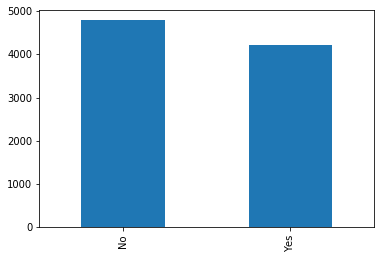

In [7]:
print(hr_data['DOJ Extended'].value_counts)

print(hr_data['DOJ Extended'].value_counts().plot.bar())

## ------------------------------------------------------------

count    8995.000000
mean       21.434464
std        25.811616
min         0.000000
25%         3.000000
50%        10.000000
75%        33.000000
max       224.000000
Name: Duration to accept offer, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


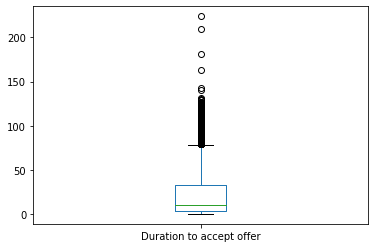

In [8]:
print(hr_data['Duration to accept offer'].describe())

print(hr_data['Duration to accept offer'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


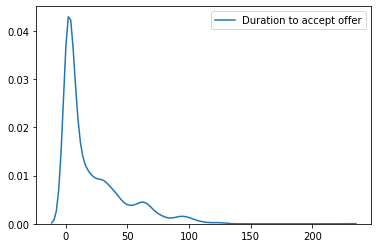

In [9]:
print(sns.kdeplot(hr_data['Duration to accept offer']))

## ------------------------------------------------

count    8995.000000
mean       39.291829
std        22.220239
min         0.000000
25%        30.000000
50%        30.000000
75%        60.000000
max       120.000000
Name: Notice period, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


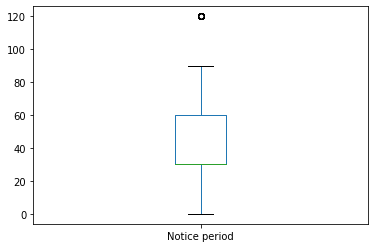

In [10]:
print(hr_data['Notice period'].describe())

print(hr_data['Notice period'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


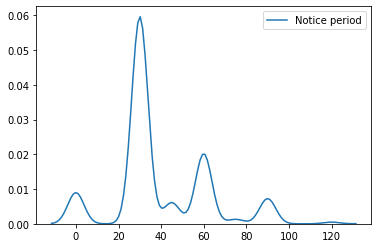

In [11]:
print(sns.kdeplot(hr_data['Notice period']))

## ------------------------------------------------------

In [12]:
print(hr_data['Offered band'].value_counts())

E1    5568
E2    2711
E3     505
E0     211
Name: Offered band, dtype: int64


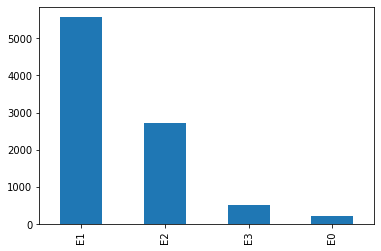

In [13]:
hr_data['Offered band'].value_counts().plot.bar()

## ------------------------------------------------

In [14]:
hr_data['Pecent hike expected in CTC'].describe()
       

count    8995.000000
mean       43.864804
std        29.788975
min       -68.830000
25%        27.270000
50%        40.000000
75%        53.850000
max       359.770000
Name: Pecent hike expected in CTC, dtype: float64

count    8995.000000
mean       40.657356
std        36.064060
min       -60.530000
25%        22.090000
50%        36.000000
75%        50.000000
max       471.430000
Name: Percent hike offered in CTC, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


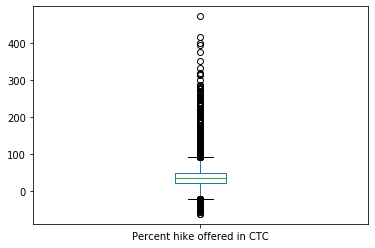

In [15]:
print(hr_data['Percent hike offered in CTC'].describe())

print(hr_data['Percent hike offered in CTC'].plot.box())

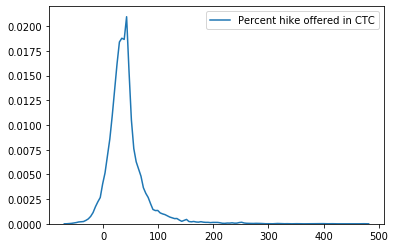

In [16]:
sns.kdeplot(hr_data['Percent hike offered in CTC'])

## --------------------------------------------------------

count    8995.000000
mean       -1.573802
std        19.610729
min       -67.270000
25%        -8.330000
50%         0.000000
75%         0.000000
max       300.000000
Name: Percent difference CTC, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


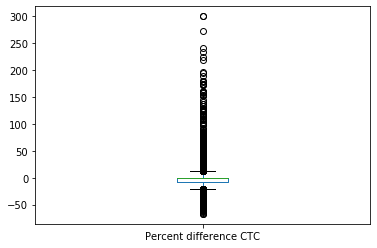

In [17]:
print(hr_data['Percent difference CTC'].describe())

print(hr_data['Percent difference CTC'].plot.box())

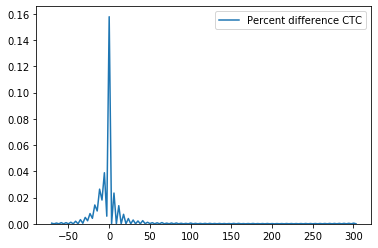

In [18]:
sns.kdeplot(hr_data['Percent difference CTC'])

## --------------------------------------------------

No     8578
Yes     417
Name: Joining Bonus, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


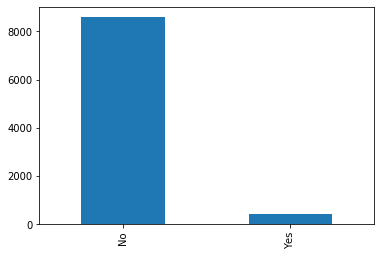

In [19]:
print(hr_data['Joining Bonus'].value_counts())

print(hr_data['Joining Bonus'].value_counts().plot.bar())

## ------------------------------------------

No     7705
Yes    1290
Name: Candidate relocate actual, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


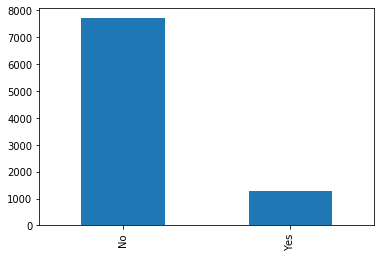

In [20]:
print(hr_data['Candidate relocate actual'].value_counts())

print(hr_data['Candidate relocate actual'].value_counts().plot.bar())

## ----------------------------------------

Male      7444
Female    1551
Name: Gender, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


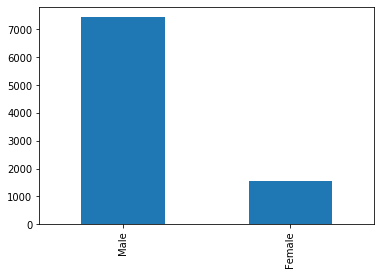

In [21]:
print(hr_data['Gender'].value_counts())

print(hr_data['Gender'].value_counts().plot.bar())

## --------------------------------------------------------

Direct               4801
Agency               2585
Employee Referral    1609
Name: Candidate Source, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


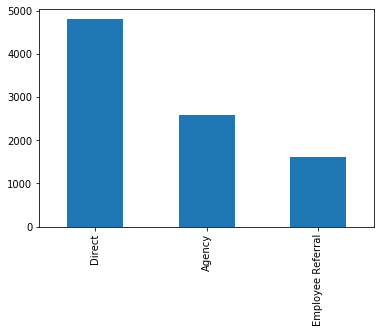

In [22]:
print(hr_data['Candidate Source'].value_counts())

print(hr_data['Candidate Source'].value_counts().plot.bar())

## --------------------------------------------------------------

count    8995.000000
mean        4.239022
std         2.547571
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        24.000000
Name: Rex in Yrs, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


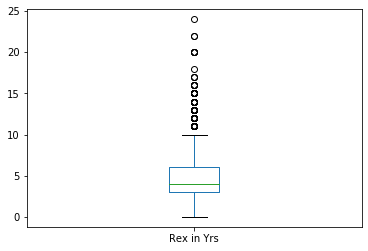

In [23]:
print(hr_data['Rex in Yrs'].describe())
print(hr_data['Rex in Yrs'].plot.box())

AxesSubplot(0.125,0.125;0.775x0.755)


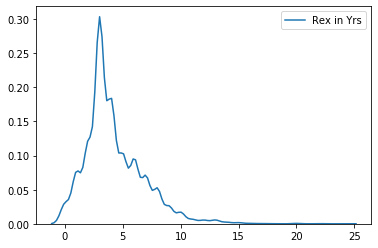

In [24]:
print(sns.kdeplot(hr_data['Rex in Yrs']))

## --------------------------------------------------

INFRA         2850
ERS           2426
BFSI          1396
ETS            691
CSMP           579
AXON           568
EAS            346
Healthcare     124
MMS             15
Name: LOB, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


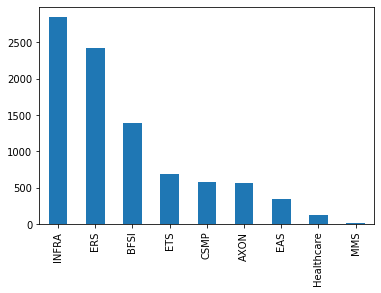

In [25]:
print(hr_data['LOB'].value_counts())

print(hr_data['LOB'].value_counts().plot.bar())

## -------------------------------------------------------

Chennai      3150
Noida        2727
Bangalore    2230
Hyderabad     341
Mumbai        197
Gurgaon       146
Kolkata       129
Pune           48
Others         13
Cochin          8
Ahmedabad       6
Name: Location, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


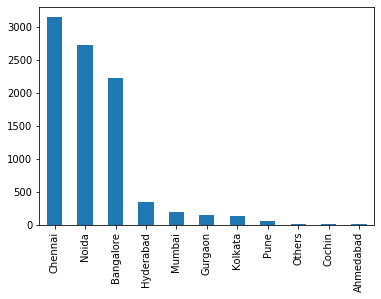

In [26]:
print(hr_data['Location'].value_counts())

print(hr_data['Location'].value_counts().plot.bar())

## Age
## ---------------------------------

In [27]:
hr_data['Age'].describe()

count    8995.000000
mean       29.913174
std         4.097912
min        20.000000
25%        27.000000
50%        29.000000
75%        34.000000
max        60.000000
Name: Age, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


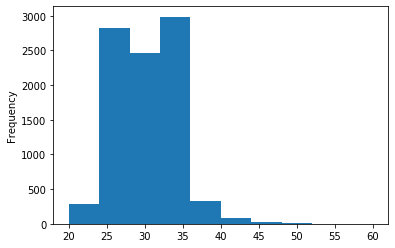

In [28]:
print(hr_data['Age'].plot.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


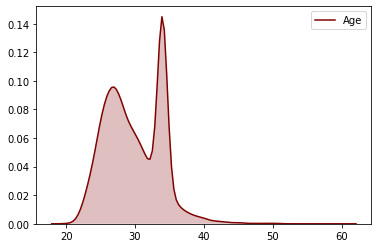

In [29]:
print(sns.kdeplot(hr_data['Age'],shade=True,color= 'maroon'))

## --------------------------------------------------

In [30]:
hr_data['Status'].value_counts()

Joined        7313
Not Joined    1682
Name: Status, dtype: int64

Joined        7313
Not Joined    1682
Name: Status, dtype: int64


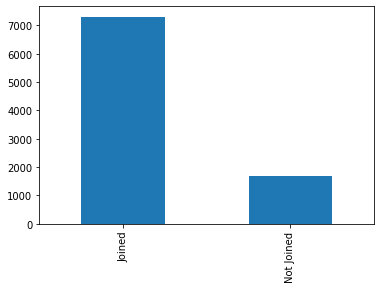

In [31]:
print(hr_data['Status'].value_counts())
hr_data['Status'].value_counts().plot.bar()

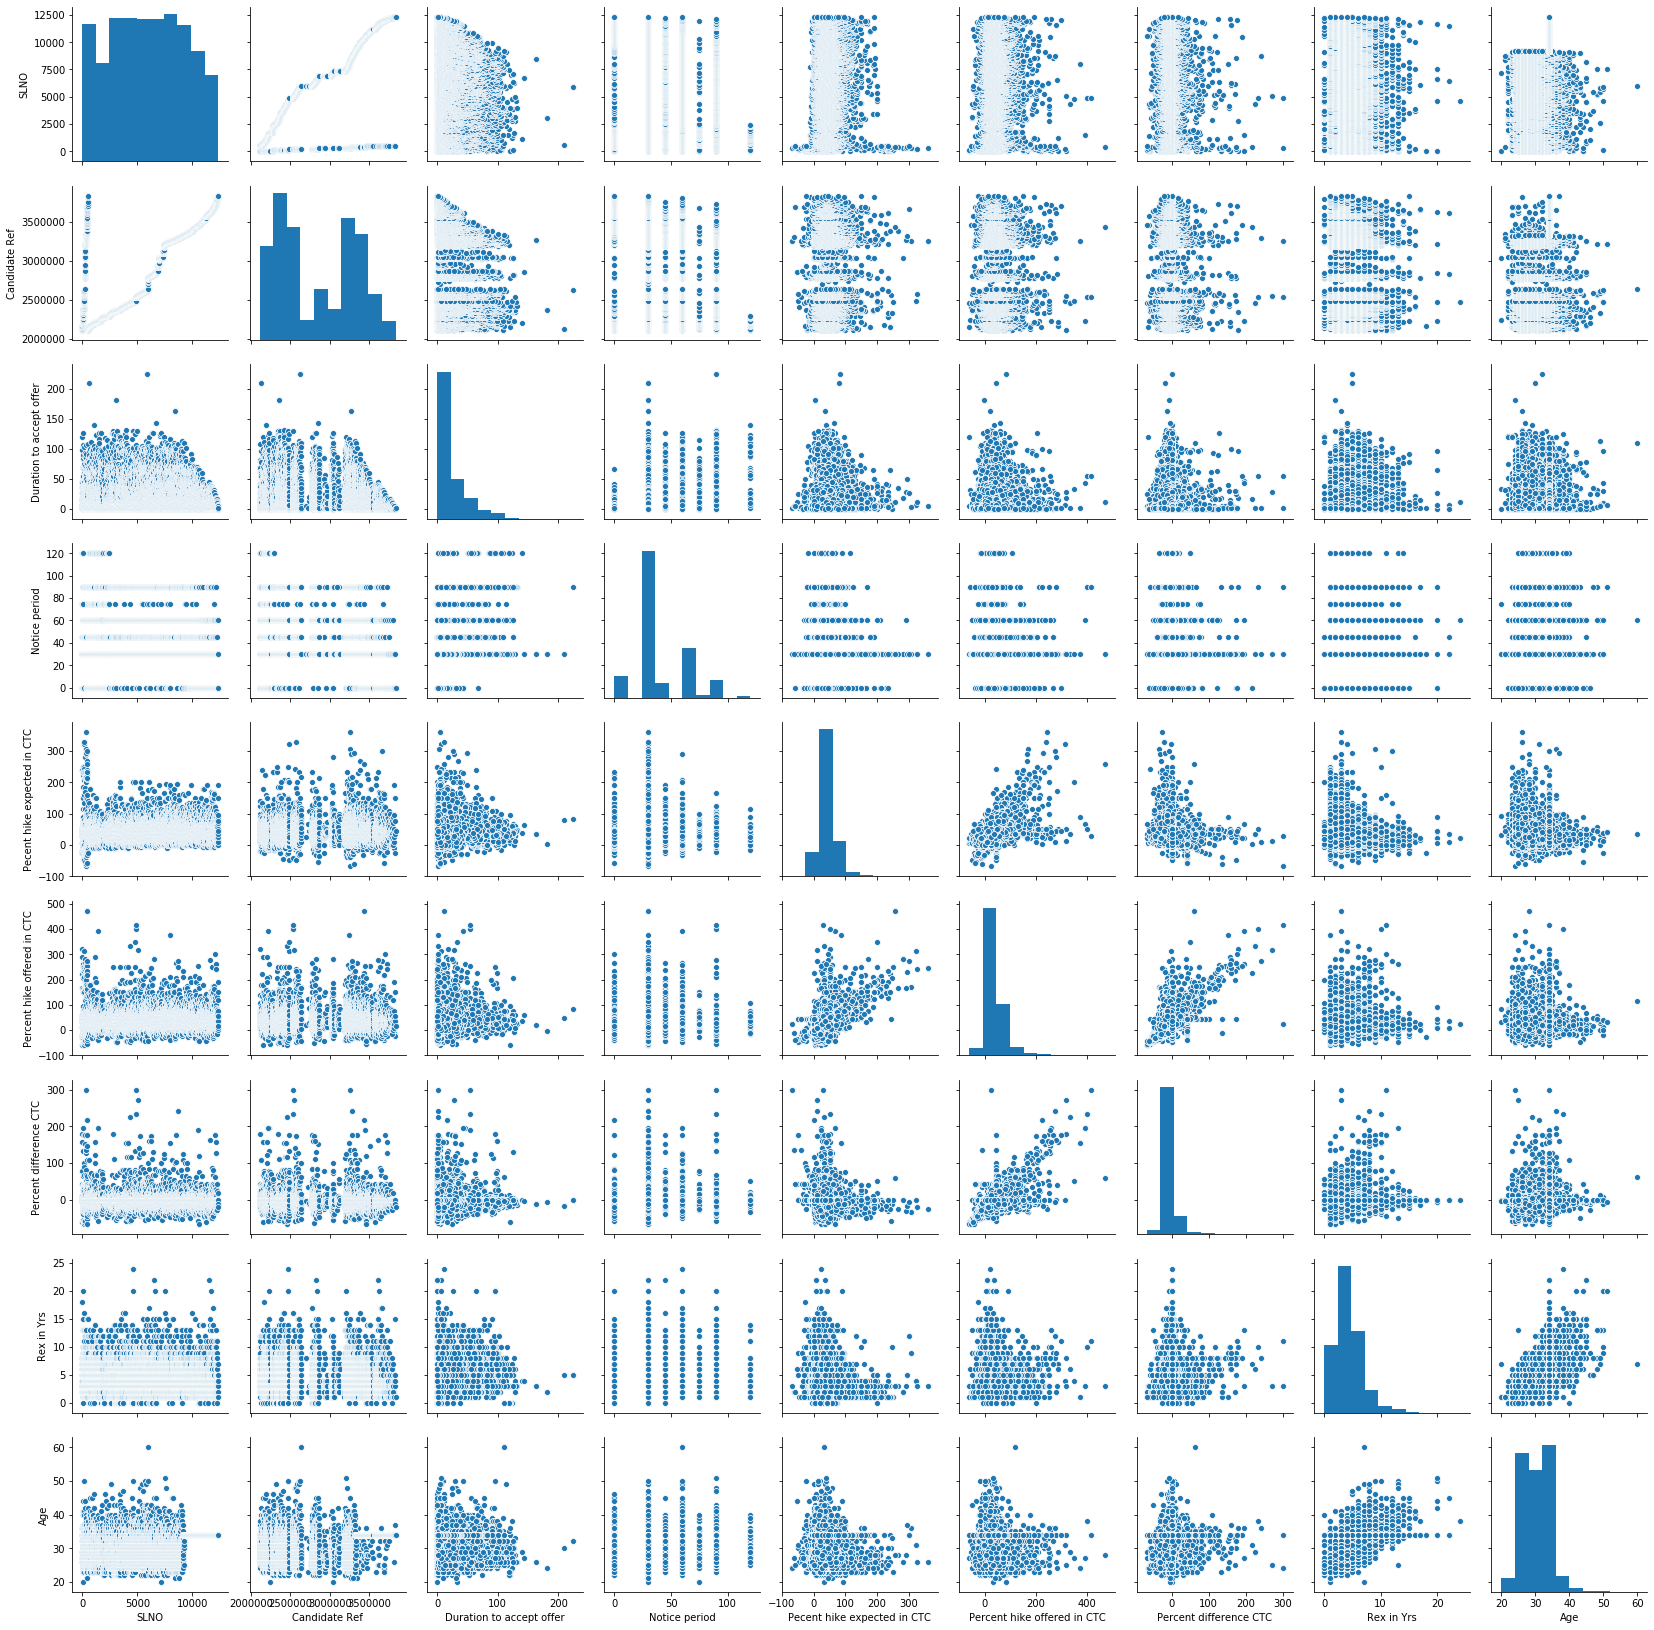

In [32]:
sns.pairplot(hr_data)

# Bi-variate Analysis

In [33]:
hr_data.columns

Index(['SLNO', 'Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

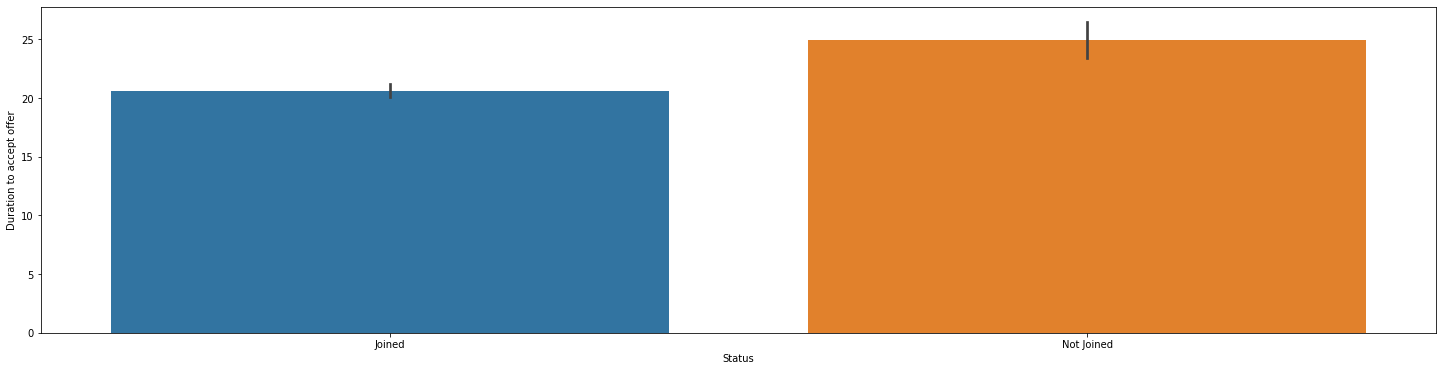

In [34]:
plt.figure(figsize=(25,6))
sns.barplot(hr_data['Status'], hr_data['Duration to accept offer'],orient='v')

In [35]:
pd.crosstab(hr_data['Status'], hr_data['Notice period'])

Notice period,0,30,45,60,75,90,120
Status,,,,,,,
Joined,726,4393,397,1285,75,415,22
Not Joined,51,765,129,470,35,212,20


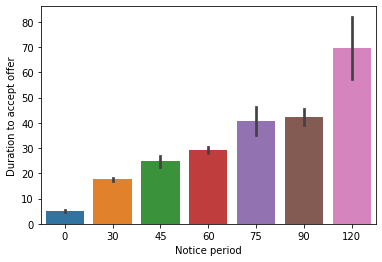

In [36]:
sns.barplot(hr_data['Notice period'], hr_data['Duration to accept offer'],orient='v')

In [37]:
hr_data['Duration to accept offer'].nunique()

136

In [38]:
# Apply stats on the data-set

In [39]:
#we need to get numeric data and apply boxplot on it to know about out-liers
num_hr_data = hr_data._get_numeric_data()

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

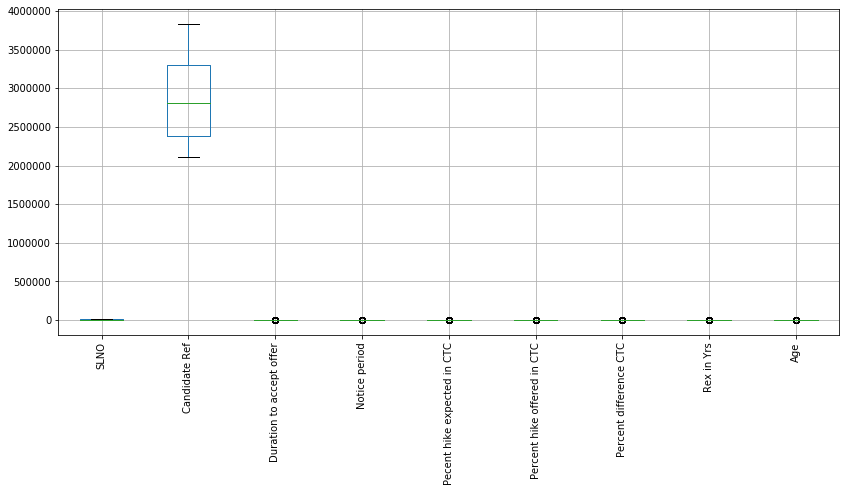

In [40]:
plt.figure(figsize=(14,6))
num_hr_data.boxplot()
plt.xticks(rotation = 90)

## Standardisation 

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()
num_hr_data2 = pd.DataFrame(sc.fit_transform(num_hr_data))
num_hr_data2.columns = num_hr_data.columns

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

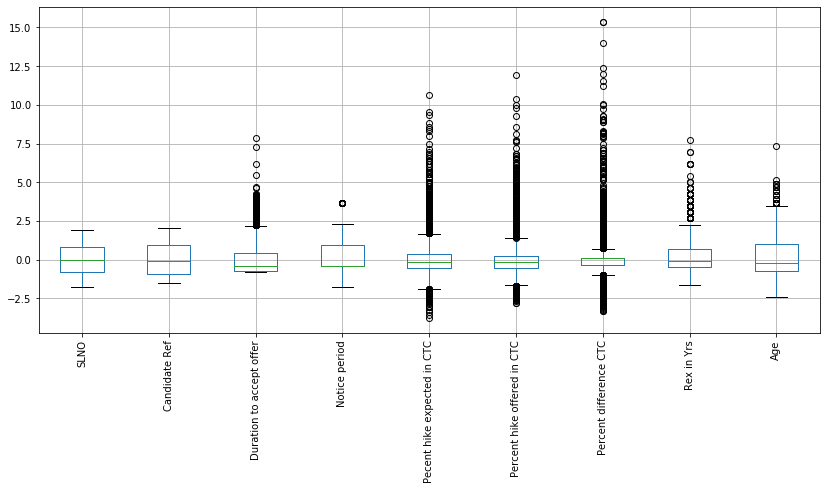

In [43]:
plt.figure(figsize=(14,6))
num_hr_data2.boxplot()
plt.xticks(rotation = 90)

In [44]:
num_hr_data2_1 = num_hr_data2.join(hr_data[['DOJ Extended','Offered band', 'Joining Bonus', 'Candidate relocate actual', 'Gender', 'Candidate Source', 'LOB', 'Location', 'Status']])

In [45]:
num_hr_data2_1 = num_hr_data2_1.drop(['SLNO', 'Candidate Ref'], axis=1)

In [46]:
num_hr_data2_1.head()

,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age,DOJ Extended,Offered band,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,LOB,Location,Status
0,-0.288044,-0.418193,-2.170548,-0.762501,2.265916,1.083829,0.997350,Yes,E2,No,No,Female,Agency,ERS,Noida,Joined
1,-0.133066,-0.418193,0.205967,7.746165,9.259416,1.476382,0.997350,No,E2,No,No,Male,Employee Referral,INFRA,Chennai,Joined
2,-0.714232,0.256905,-0.034404,0.060525,0.080257,-0.093829,-0.710932,No,E2,No,No,Male,Agency,INFRA,Noida,Joined
3,0.176889,-0.418193,-0.034404,0.060525,0.080257,-0.093829,0.997350,No,E2,No,No,Male,Employee Referral,INFRA,Noida,Joined
4,-0.791721,3.632394,-0.042797,0.053592,0.080257,0.691277,0.997350,Yes,E2,No,Yes,Male,Employee Referral,INFRA,Noida,Joined


* By seeing above graph we can understand that StandardScalar, data has more outliers

### Out-lier Treatment

In [47]:
# Notice period

q1,q2,q3 = num_hr_data2_1['Notice period'].quantile([0.25,0.50,0.75])
IQR = q3-q1
LB = q1 - 1.5*IQR
UB = q3 + 1.5*IQR
count = 0
for i in num_hr_data2_1['Notice period']:
    if i < LB or i > UB:
        count+=1
print(count)


max1,min1 = num_hr_data2_1['Item_Visibility'].quantile([0.99,0.001])

#Method 2
num_hr_data2_1['Item_Visibility'] = num_hr_data2_1['Item_Visibility'].replace(num_hr_data2_1[num_hr_data2_1['Item_Visibility']>upper_b]['Item_Visibility'],market['Item_Visibility'].quantile(0.98))
market['Item_Visibility'] = market['Item_Visibility'].replace(market[market['Item_Visibility']<lower_b]['Item_Visibility'],market['Item_Visibility'].quantile(0.001))
sns.boxplot(market_num['Item_Visibility'])

42


KeyError: 'Item_Visibility'

In [ ]:
# Duration to accept offer
q1,q2,q3 = num_hr_data2_1['Duration to accept offer'].quantile([0.25,0.50,0.75])
IQR = q3-q1
LB = q1 - 1.5*IQR
UB = q3 + 1.5*IQR
count = 0
for i in num_hr_data2_1['Duration to accept offer']:
    if i < LB or i > UB:
        count+=1
print(count)

In [ ]:
# % hike exp. in CTC
q1,q2,q3 = num_hr_data2_1['Pecent hike expected in CTC'].quantile([0.25,0.50,0.75])
IQR = q3-q1
LB = q1 - 1.5*IQR
UB = q3 + 1.5*IQR
count = 0
for i in num_hr_data2_1['Pecent hike expected in CTC']:
    if i < LB or i > UB:
        count+=1
print(count)

In [ ]:
# %  hike offered in CTC
q1,q2,q3 = num_hr_data2_1['Percent hike offered in CTC'].quantile([0.25,0.50,0.75])
IQR = q3-q1
LB = q1 - 1.5*IQR
UB = q3 + 1.5*IQR
count = 0
for i in num_hr_data2_1['Percent hike offered in CTC']:
    if i < LB or i > UB:
        count+=1
print(count)

In [ ]:
# % diff CTC
q1,q2,q3 = num_hr_data2_1['Percent difference CTC'].quantile([0.25,0.50,0.75])
IQR = q3-q1
LB = q1 - 1.5*IQR
UB = q3 + 1.5*IQR
count = 0
for i in num_hr_data2_1['Percent difference CTC']:
    if i < LB or i > UB:
        count+=1
print(count)

In [ ]:
# REX in yrs
q1,q2,q3 = num_hr_data2_1['Rex in Yrs'].quantile([0.25,0.50,0.75])
IQR = q3-q1
LB = q1 - 1.5*IQR
UB = q3 + 1.5*IQR
count = 0
for i in num_hr_data2_1['Rex in Yrs']:
    if i < LB or i > UB:
        count+=1
print(count)

In [ ]:
# Age
q1,q2,q3 = num_hr_data2_1['Age'].quantile([0.25,0.50,0.75])
IQR = q3-q1
LB = q1 - 1.5*IQR
UB = q3 + 1.5*IQR
count = 0
for i in num_hr_data2_1['Age']:
    if i < LB or i > UB:
        count+=1
print(count)

### Heat Map

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(num_hr_data2_1.corr(),square=True)

## One-hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one = OneHotEncoder()
hr_data2_Oenc = one.fit_transform(num_hr_data2_1)

In [ ]:
pd.DataFrame(hr_data2_Oenc).head()

In [ ]:
hr_data2_dummy = pd.get_dummies(num_hr_data2_1, drop_first=True)

In [ ]:
hr_data2_dummy.head()

In [ ]:
hr_data2_dummy.columns

In [ ]:
x = hr_data2_dummy.iloc[:,:-1]
y = hr_data2_dummy.iloc[:, -1]


In [ ]:
# filter out applicants that got admitted
joined_comp = hr_data2_dummy.loc[y==0]

# filter out applicants that didn't get admitted
not_join_comp = hr_data2_dummy.loc[y==1]


plt.scatter(joined_comp.iloc[:, 0], joined_comp.iloc[:, 1], s=25, label='Admitted')
plt.scatter(not_join_comp.iloc[:, 0], not_join_comp.iloc[:, 1], s=10, label='Not Admitted')
plt.show()
plt.legend()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =0, test_size = 0.2)

# Navie Bayes algorithm training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from time import time

In [ ]:
gnb = GaussianNB()
print('Start training...')
tStart = time()
gnb.fit(x_train, y_train)
tEnd = time()
print('Training time :', round(tEnd - tStart, 3), 's')

# making predictions on the testing set
y_pred = gnb.predict(x_test)
print('Accuracy:', metrics.accuracy_score(y_test,y_pred)*100)

In [ ]:
cm= confusion_matrix(y_test,y_pred)
print('Confusion matrix is:', cm, sep='\n')

tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()    #ravel() --> other way to flatten the matrix(tuple unpacking)
print('True negatives :', tn)   #won't it be TP??
print('False positives :', fp)
print('False negatives :', fn)
print('True positives :', tp)

### ROC Curve

In [ ]:
probs = gnb.predict_proba(x_test)
probs



#Keep Probabilities of the positive class only
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)


# plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color ='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('Flase Positive Rate')
plt.show()

# -----------------------------------------------------------------------------------------------------------

## Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR = LR.fit(x_train,y_train)

In [ ]:
y_pred=LR.predict(x_test)


# finding accuracy score
print('Accuracy is:', metrics.accuracy_score(y_test,y_pred)*100)

score=LR.score(x_test,y_test)
print(score)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix:', cm, sep='\n')

tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()    #ravel() --> other way to flatten the matrix(tuple unpacking)
print('True negatives :', tn)   #won't it be TP??
print('False positives :', fp)
print('False negatives :', fn)
print('True positives :', tp)

### ROC Curve

In [ ]:
probs = LR.predict_proba(x_test)

#Keep Probabilities of the positive class only
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)

# plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color ='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('Flase Positive Rate')
plt.show()

# -----------------------------------------------------------------------------------------------------------

## KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
#Fitting the model
knn = KNeighborsClassifier(n_neighbors=2) #defalut k=sqrt(n), but there is a theory to choose k-value

knn = knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

#Alternatively
from sklearn import metrics
print('Accuracy=',metrics.accuracy_score(y_test,y_pred))
#metrics.accuracy_score(y_test, y_pred))

cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix is:', cm, sep='\n')


tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()    #ravel() --> other way to flatten the matrix(tuple unpacking)
print('True negatives :', tn)   #won't it be TP??
print('False positives :', fp)
print('False negatives :', fn)
print('True positives :', tp)

## ROC Curve

In [ ]:
probs = knn.predict_proba(x_test)
probs



#Keep Probabilities of the positive class only
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)


# plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], color ='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('Flase Positive Rate')
plt.show()

In [ ]:
# idxmax() - Return the row label of the maximum value.
hr_data['Location'].value_counts().idxmax()

In [ ]:
(8000/50002)*100